# Author: Ruslan Brilenkov 
## Contact: [LinkedIn](https://www.linkedin.com/in/ruslan-brilenkov/)

# A step-by-step guide to Keras CNN
## [Original article](https://medium.datadriveninvestor.com/convolutional-neural-networks-cnn-in-keras-tensorflow-step-by-step-guide-9961bdb73f15)

# Step 1: Importing the necessary libraries 

In [1]:
# of course, numerical Python:
import numpy as np
# utilities for the categorical data:
from tensorflow.keras.utils import to_categorical
# dataset:
from keras.datasets import cifar10

# building blocks of Keras:
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

# Step 2: Loading our data set

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUMB_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUMB_CLASSES)
print(y_test[0])
y_test = to_categorical(y_test, NUMB_CLASSES)
print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
np.argmax(y_train, axis = -1)

array([6, 9, 9, ..., 9, 1, 1])

## Visualizing a dataset

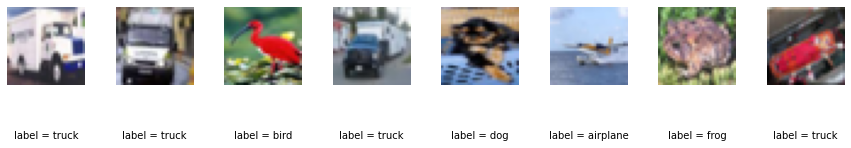

In [5]:
import matplotlib.pyplot as plt

# assigning a label to each class:
MY_CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
actual_label = MY_CLASSES[np.argmax(y_train, axis = -1)]

# chosign a number of images to show on one panel:
n_to_show = 8
indices = np.random.choice(range(len(x_train)), n_to_show)

# creating a figure
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.text(0.5, -0.7, f"label = {actual_label[idx]}", fontsize=10
                , ha='center', transform=ax.transAxes)
    ax.axis('off')
    ax.imshow(img)

# Step 3: Deciding on CNN architecture

In short, Keras CNN architecture is defined by 
- a number of CNN layers;
- a number of filters/kernels;
- a size of strides;
- padding.

In [6]:
from keras.layers import Input, Flatten, Dense
from keras.layers.convolutional import Conv2D
from keras.models import Model

# input image size
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10, 
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
    )(conv_layer_1)

conv_layer_3 = Conv2D(
    filters = 30,
    kernel_size = (3,3),
    strides = 1,
    padding = 'same'
    )(conv_layer_2)

flatten_layer = Flatten()(conv_layer_3)
# number of units = number of labels
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)


## We can summarize our model as follows

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 30)          5430      
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                19210     
Total params: 26,950
Trainable params: 26,950
Non-trainable params: 0
_________________________________________________________

# Step 4: Compiling our model

## This step requires 3 things. One is optimizer type. Two is loss function. Three is performance evaluaiton metrics

In [15]:
from keras.optimizers import Adam
# define optimizer
opt = Adam(learning_rate=0.0005)
# compile the model with the optimizer, loss function and metrics for evaluation
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

# Step 5: Training our model

## This step is pretty straightforward. Provide the training data X, and labels Y. Batch size, epochs for how long to train and whether to shuffle the data or not.

In [16]:
# training our model 
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True
         )

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9045 - accuracy: 0.3296
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7329 - accuracy: 0.4042
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7177 - accuracy: 0.4153
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7033 - accuracy: 0.4210
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6999 - accuracy: 0.4234
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6886 - accuracy: 0.4254
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6864 - accuracy: 0.4258
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6817 - accuracy: 0.4266
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6763 - accuracy: 0.4343
Epoch 10/10
1563/1563 [==============================] - 16s 10ms/s

## As we see, our training process reduces loss and increases accuracy!

## But what about the model performance on the out-of-sample data, i.e., the data which our NN has never seen before?

# Step 6: Evaluating our model

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.7425 - accuracy: 0.3975


[1.7425134181976318, 0.39750000834465027]

# Step 7: (Bonus) visualization of our model

In [18]:
MY_CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

pred = model.predict(x_test)
pred_single = MY_CLASSES[np.argmax(pred, axis = -1)]
actual_label = MY_CLASSES[np.argmax(y_test, axis = -1)]

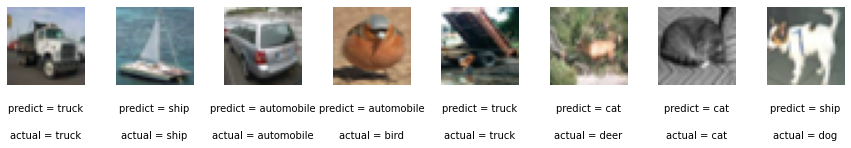

In [19]:
import matplotlib.pyplot as plt

n_to_show = 8
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.text(0.5, -0.35, f"predict = {pred_single[idx]}", fontsize=10
              , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"actual = {actual_label[idx]}", fontsize=10
                , ha='center', transform=ax.transAxes)
    ax.axis('off')
    ax.imshow(img)


---

# Conclusions

As we can see,this simple convolutional neural network (CNN) performs poorer than a simple classical neural network (NN), which I build in the previous part of this project. 

This is not a final judgement of our CNN because of the two reasons:
1. the network architecture is pretty basic, so it does not produce very elaborate training ground;
2. we can still greatly improve this CNN by adding a few additional layers, which are batch normalization and droupout layers.

In the next part of this project, I will implement these changes and show how anyone can easily create any CNN architecture in Keras similar to combining LEGO blocks. 